In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Data Exploration

In [3]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
sample_df = pd.read_csv('test.csv')

In [4]:
train_df.sample(5)

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
723,723,359,1021.1,17.6,16.3,15.2,13.9,79.0,88.0,0.1,50.0,39.3,1
956,956,227,1010.9,29.6,26.4,24.5,23.6,82.0,58.0,4.8,100.0,17.3,1
211,211,212,1006.5,30.6,27.4,24.9,25.0,84.0,88.0,2.1,190.0,21.9,1
904,904,175,1008.7,31.6,28.2,26.8,26.6,89.0,82.0,2.4,240.0,25.9,1
66,66,67,1020.3,18.4,15.7,14.6,12.6,59.0,88.0,0.0,40.0,27.4,1


In [5]:
test_df.sample(5)

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
313,2503,314,1017.9,21.2,18.8,16.6,16.4,87.0,81.0,0.0,70.0,15.3
113,2303,114,1009.9,28.7,26.2,24.2,25.3,89.0,88.0,0.3,200.0,24.4
379,2569,15,1023.9,15.6,13.4,11.0,12.8,79.0,88.0,0.0,20.0,18.4
722,2912,358,1020.2,22.8,19.9,17.3,16.7,85.0,84.0,0.2,70.0,23.5
359,2549,360,1019.9,16.7,15.5,14.9,14.5,97.0,97.0,0.0,50.0,26.8


In [6]:
sample_df.sample(3)

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
561,2751,197,1008.4,32.3,29.4,26.8,24.8,75.0,38.0,10.8,10.0,8.0
412,2602,48,1014.0,19.8,17.1,15.9,10.0,75.0,89.0,0.1,50.0,20.8
338,2528,339,1019.5,17.4,15.2,14.1,12.9,79.0,93.0,0.0,60.0,28.3


# Data Transformation, Analysis and Model Building on Training Data

In [7]:
print(f"There are {train_df.shape[0]} rows and {train_df.shape[1]} columns")


There are 2190 rows and 13 columns


In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2190 entries, 0 to 2189
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             2190 non-null   int64  
 1   day            2190 non-null   int64  
 2   pressure       2190 non-null   float64
 3   maxtemp        2190 non-null   float64
 4   temparature    2190 non-null   float64
 5   mintemp        2190 non-null   float64
 6   dewpoint       2190 non-null   float64
 7   humidity       2190 non-null   float64
 8   cloud          2190 non-null   float64
 9   sunshine       2190 non-null   float64
 10  winddirection  2190 non-null   float64
 11  windspeed      2190 non-null   float64
 12  rainfall       2190 non-null   int64  
dtypes: float64(10), int64(3)
memory usage: 222.5 KB


In [9]:
train_df.isnull().sum()

id               0
day              0
pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
sunshine         0
winddirection    0
windspeed        0
rainfall         0
dtype: int64

In [10]:
# Dropping the id columns
train_df = train_df.drop('id', axis = 1)

# Data Visualization

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [12]:
train_df.sample()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
618,254,1006.1,32.4,29.4,26.6,24.9,81.0,78.0,7.8,230.0,27.1,1


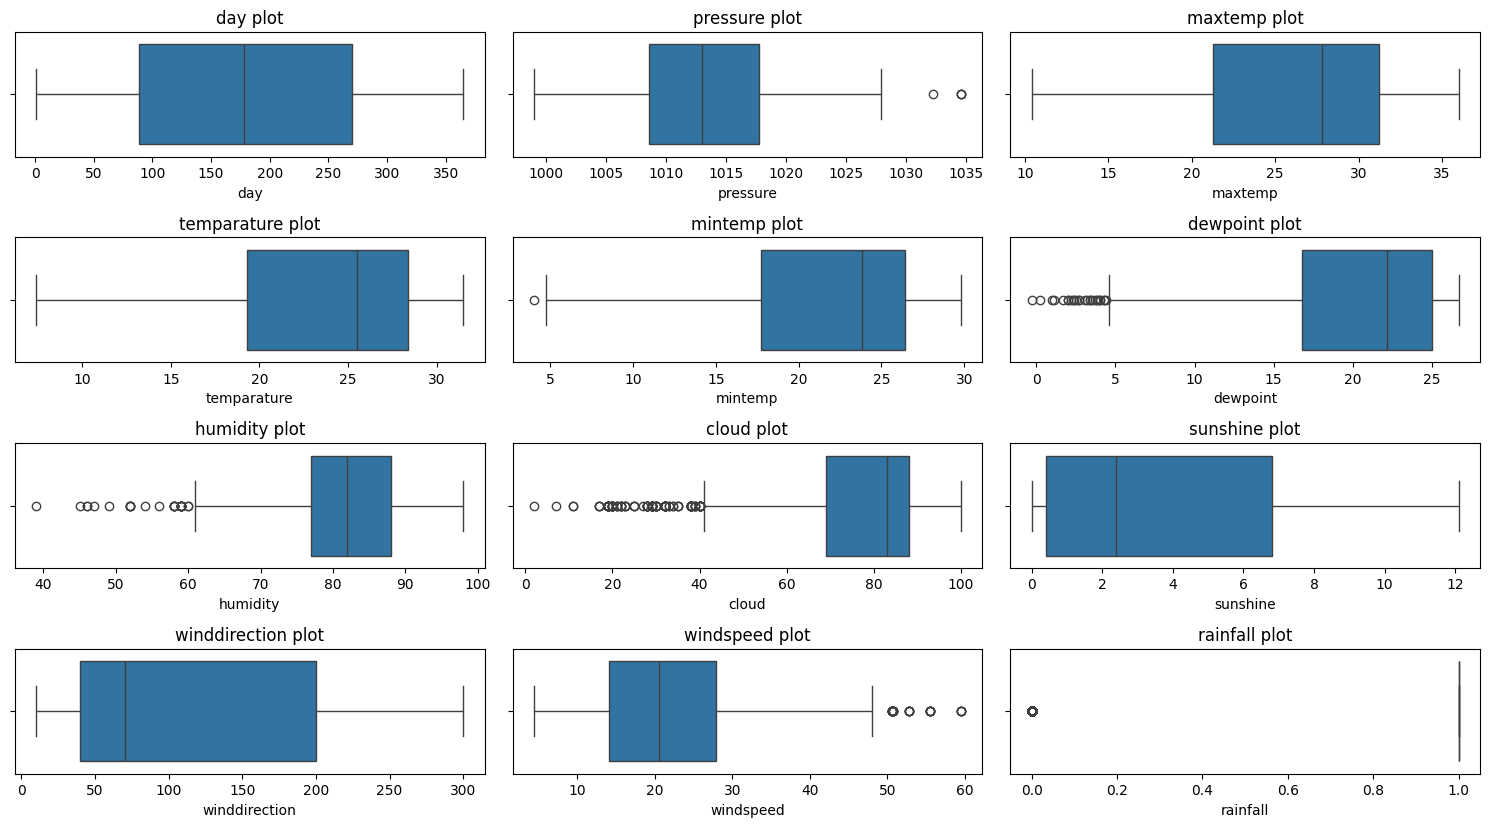

In [13]:
def boxplot(data):
    num_cols = train_df.select_dtypes(exclude = 'O').columns
    for i, j in enumerate(num_cols):
        plt.subplot(len(num_cols)//3+1, 3, i+1 )
        sns.boxplot(data = data, x = j)
        plt.title(f"{j} plot")
    plt.tight_layout()

plt.figure(figsize = (15, 10))
boxplot(train_df)

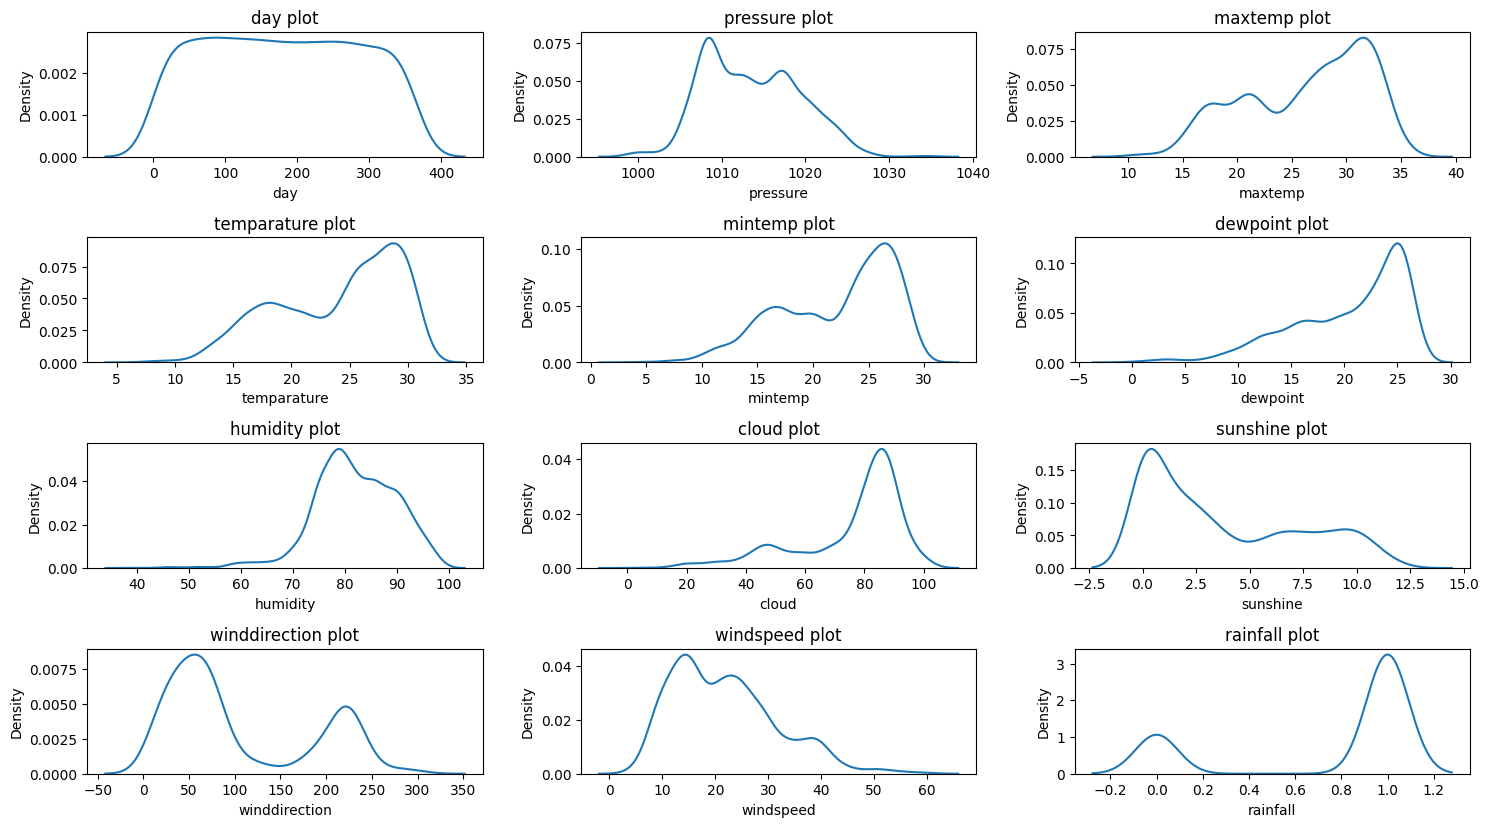

In [14]:
def kdeplot(data):
    num_cols = train_df.select_dtypes(exclude = 'O').columns
    for i, j in enumerate(num_cols):
        plt.subplot(len(num_cols)//3+1, 3, i+1 )
        sns.kdeplot(data = data, x = j)
        plt.title(f"{j} plot")
    plt.tight_layout()

plt.figure(figsize = (15, 10))
kdeplot(train_df)

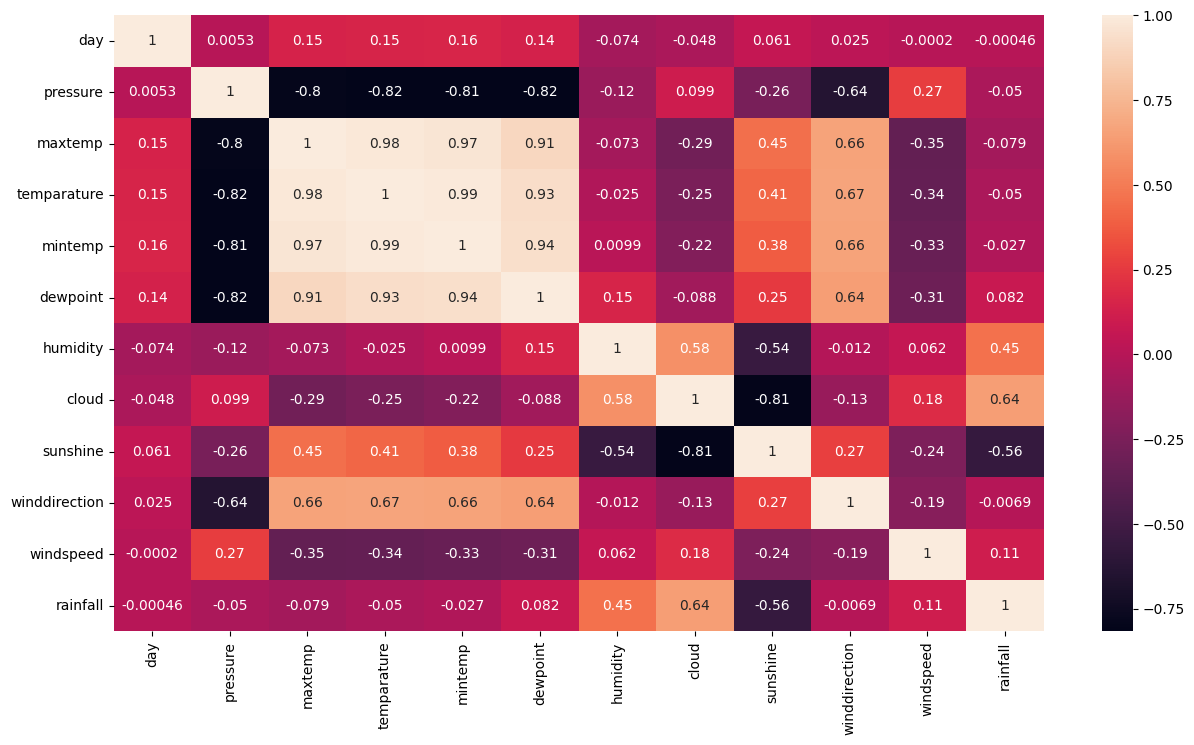

In [15]:
plt.figure(figsize = (15, 8))
sns.heatmap(train_df.corr(), annot = True)
plt.show()

# Train Test Split and Data Preprocessing

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = train_df.drop('rainfall', axis = 1)
y = train_df.rainfall

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 9)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [17]:
X_train_scaled

array([[-0.28879544, -0.67917482,  1.43104226, ...,  2.12277774,
         1.20271606, -0.93787558],
       [ 1.02857277,  0.22042969, -0.00290135, ..., -0.20701085,
        -0.80666162,  0.01813276],
       [-0.94274081, -0.5909783 , -1.54306301, ..., -1.0390782 ,
        -0.68107552,  1.99117123],
       ...,
       [-0.42148001, -1.0319609 ,  1.16549715, ...,  1.4016527 ,
         1.45388827, -0.47004171],
       [ 1.58774344,  0.74960882, -1.7377961 , ..., -1.0390782 ,
        -0.55548941,  0.70971325],
       [-1.54929884,  1.68449194, -1.54306301, ..., -1.0390782 ,
        -1.05783383, -0.14459207]])

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

models = {
          "Logistic Regression": LogisticRegression(),
          "Decision Tree": DecisionTreeClassifier(),
          "Random Forest": RandomForestClassifier(),
          "AdaBoost": AdaBoostClassifier(),
          "Gradient Boost": GradientBoostingClassifier(),
          "XGBoost": XGBClassifier(),
          "KNN": KNeighborsClassifier()
         }

result_list = []
for model_name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    ar_score = accuracy_score(y_test, y_pred)
    pre_score = precision_score(y_test, y_pred)
    rec_score = recall_score(y_test, y_pred)
    f_score = f1_score(y_test, y_pred)
    roc_score = roc_auc_score(y_test, model.predict_proba(X_test_scaled)[:,1])

    metrics_dict = {
    'model name': model_name,
    'accuracy score': ar_score,
    'precision score': pre_score,
    'recall score': rec_score,
    'f1-score': f_score,
    'roc_auc_score': roc_score 
    }

    result_list.append(metrics_dict)

metric_df = pd.DataFrame(result_list)
metric_df

,model name,accuracy score,precision score,recall score,f1-score,roc_auc_score
0,Logistic Regression,0.878419,0.889734,0.955102,0.921260,0.922255
1,Decision Tree,0.814590,0.868000,0.885714,0.876768,0.746429
2,Random Forest,0.872340,0.883019,0.955102,0.917647,0.898324
3,AdaBoost,0.869301,0.885496,0.946939,0.915187,0.914480
4,Gradient Boost,0.881459,0.884328,0.967347,0.923977,0.904470
5,XGBoost,0.875380,0.875000,0.971429,0.920696,0.884062
6,KNN,0.848024,0.865169,0.942857,0.902344,0.860909


In [19]:
metric_df.sort_values(by = ['accuracy score', 'roc_auc_score'], ascending = False)

,model name,accuracy score,precision score,recall score,f1-score,roc_auc_score
4,Gradient Boost,0.881459,0.884328,0.967347,0.923977,0.904470
0,Logistic Regression,0.878419,0.889734,0.955102,0.921260,0.922255
5,XGBoost,0.875380,0.875000,0.971429,0.920696,0.884062
2,Random Forest,0.872340,0.883019,0.955102,0.917647,0.898324
3,AdaBoost,0.869301,0.885496,0.946939,0.915187,0.914480
6,KNN,0.848024,0.865169,0.942857,0.902344,0.860909
1,Decision Tree,0.814590,0.868000,0.885714,0.876768,0.746429


In [20]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

lg_params = {
    'penalty': ['l1', 'l2'],       # type of regularization
    'C': [0.01, 0.1, 1, 10, 100],  # inverse regularization strength
    'solver': ['liblinear', 'saga']
}

gb_params = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.05, 0.1, 0.01],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0]
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

gridcv_models = [
    ("Gradient Boost Classifier", GradientBoostingClassifier(), gb_params),
    ("Logistic Regression", LogisticRegression(), lg_params)
]


for model_name, model, params in gridcv_models:
    gridcv = GridSearchCV(estimator= model, cv = cv, scoring = 'roc_auc', verbose= 1, n_jobs = -1, param_grid= params)
    gridcv.fit(X_train_scaled, y_train)
    
    print(f"---------------{model_name}---------------")
    print(gridcv.best_params_)
    print(gridcv.best_estimator_)
    print(roc_auc_score(y_test, gridcv.predict_proba(X_test_scaled)[:,1]))

Fitting 5 folds for each of 54 candidates, totalling 270 fits
---------------Gradient Boost Classifier---------------
{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300, 'subsample': 0.8}
GradientBoostingClassifier(learning_rate=0.01, n_estimators=300, subsample=0.8)
0.9171525753158406
Fitting 5 folds for each of 20 candidates, totalling 100 fits
---------------Logistic Regression---------------
{'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
LogisticRegression(C=0.1, solver='liblinear')
0.9217201166180758


# Prediction on Test data

In [21]:
test_df.sample(5)

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
189,2379,190,1007.8,31.7,29.0,27.9,25.0,78.0,79.0,6.6,220.0,19.6
492,2682,128,1007.8,29.1,27.3,25.6,25.6,93.0,88.0,0.8,230.0,16.3
164,2354,165,1008.2,33.3,30.2,28.7,25.3,74.0,44.0,10.4,220.0,17.2
162,2352,163,1009.9,33.7,30.1,28.1,24.7,74.0,46.0,10.8,200.0,24.9
174,2364,175,1008.8,32.0,29.2,27.6,25.2,86.0,88.0,6.5,220.0,13.2


In [22]:
test_df.shape

(730, 12)

In [23]:
test_df.isnull().sum()

id               0
day              0
pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
sunshine         0
winddirection    1
windspeed        0
dtype: int64

In [24]:
test_df.winddirection = test_df.winddirection.fillna(test_df.winddirection.mean())

In [25]:
test_df_copy = test_df
test_df_copy = test_df_copy.drop('id', axis = 1)

In [26]:
# Data Preprocessing
test_scaled_df = scaler.transform(test_df_copy)

# Prediction on test df
model= LogisticRegression(C=0.1, solver='liblinear', penalty= 'l2')
model.fit(X_train_scaled, y_train)

print(f"Roc-Auc Score: {roc_auc_score(y_test, model.predict_proba(X_test_scaled)[:,1])}")
y_pred = model.predict_proba(test_scaled_df)[:,1]
y_pred[:5]

Roc-Auc Score: 0.9217201166180758


array([0.97090674, 0.97718405, 0.91119499, 0.12322066, 0.05449471])

# Submission

In [27]:
submission = pd.DataFrame({'id': test_df.id,
             'rainfall': y_pred})
submission

,id,rainfall
0,2190,0.970907
1,2191,0.977184
2,2192,0.911195
3,2193,0.123221
4,2194,0.054495
...,...,...
725,2915,0.969707
726,2916,0.884703
727,2917,0.962769
728,2918,0.982035


In [28]:
submission.to_csv('submission.csv', index = False)
print("Sucessfully saved!")

Sucessfully saved!


In [29]:
import pickle

#Saving the data preprocessing pipeline
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

# Saving the model
with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)